# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [3]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [6]:
athletes.sample(5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
10967,253018225,Wei Yu,CHN,male,9/11/87,1.80,55.0,athletics,0,0,0
10342,84694873,Taylor Sander,USA,male,3/17/92,1.96,80.0,volleyball,0,0,1
9816,36387534,Shiying Liu,CHN,female,9/24/93,1.79,76.0,athletics,0,0,0
1093,174361869,Arcangeline Fouodji Sonkbou,CMR,female,8/26/87,1.58,68.0,weightlifting,0,0,0
266,172435291,Albert Kibichii Rop,BRN,male,7/17/92,1.77,63.0,athletics,0,0,0


In [154]:
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [7]:
athletes.drop('id', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
height,11208.0,1.766282,0.112719,1.21,1.69,1.76,1.84,2.21
weight,10879.0,72.068205,16.177334,31.00,60.00,70.00,81.00,170.00
gold,11538.0,0.057722,0.255910,0.00,0.00,0.00,0.00,5.00
silver,11538.0,0.056769,0.239147,0.00,0.00,0.00,0.00,2.00
bronze,11538.0,0.061016,0.243320,0.00,0.00,0.00,0.00,2.00


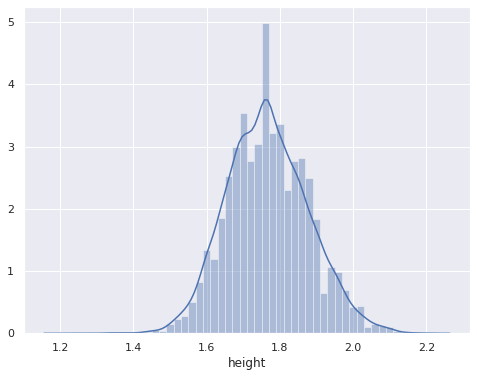

In [8]:
plt.figure(figsize=(8, 6))
sns.distplot(athletes['height'].fillna(athletes['height'].mean()))
#plt.show()

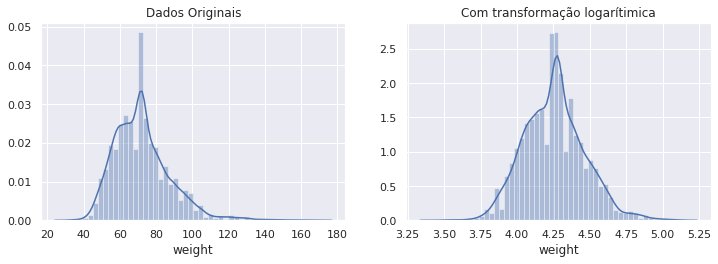

In [9]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.distplot(athletes['weight'].fillna(athletes['weight'].mean()), ax=ax1)
ax1.set_title('Dados Originais')

log = np.log(athletes['weight'].fillna(athletes['weight'].mean()))
sns.distplot(log, ax=ax2)
ax2.set_title('Com transformação logarítimica')

#plt.show()

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [104]:
sct.shapiro(get_sample(athletes, 'height', n=3000))

(0.9961519837379456, 5.681722541339695e-07)

In [119]:
def q1():
    test_shap = sct.shapiro(get_sample(athletes, 'height', n=3000))
    return bool(test_shap[1] > .05)
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [23]:
samples_h = get_sample(athletes, 'height', n=3000)

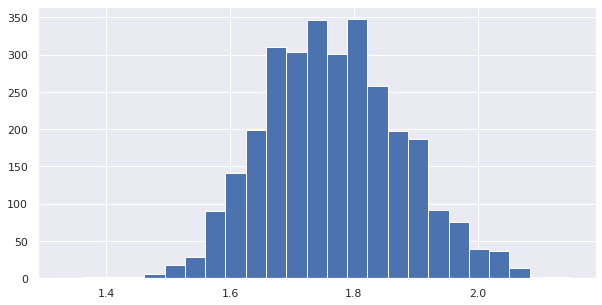

In [24]:
plt.figure(figsize=(10, 5))
plt.hist(samples_h, bins=25)
#plt.show()

__Reposta__:
* Sim, condizem. A forma que o que o gráfico apresenta no histograma segui uma distribuição normal, e como o 
p-valor foi menor que o valor de alpha(para um nível de significância de 5%) rejeitamos a hipótese nula, resultando em dizer que: não podemos confirmar que as alturas são normalmente
distribuidas.

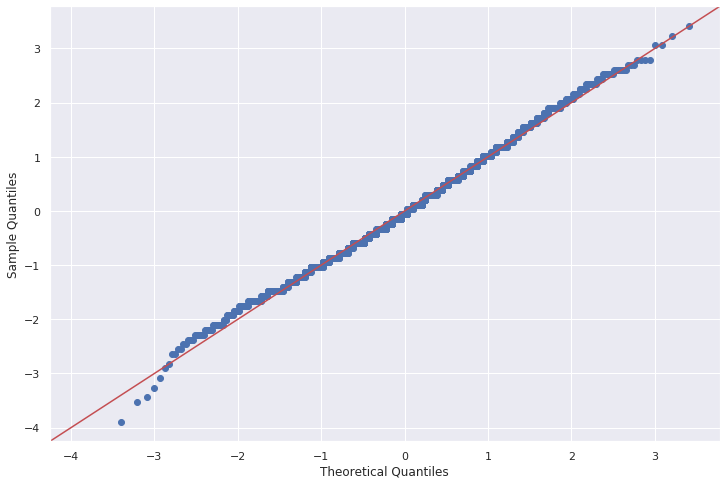

In [25]:
import statsmodels.api as sm
sm.qqplot(samples_h, fit=True, line="45");

__Resposta__:
* Como os valores estão seguindo ao longo de uma linha, a distribuição terá a mesma forma da distribuição teórica

In [120]:
test_shap = sct.shapiro(get_sample(athletes, 'height', n=3000))
test_shap, bool(test_shap[1] > .0000001)

((0.9961519837379456, 5.681722541339695e-07), True)

__Resposta__:
* Usando um nível de significância de 0.0000001 o resultado do teste muda, afirmando a aceitação da hipótese nula.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [14]:
def q2():
    test_jarque_bera = sct.jarque_bera(get_sample(athletes, 'height', n=3000))
    return bool(test_jarque_bera[1] > .05)
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

__Resposta__:
* Usando o teste de Jarque Bera a hipótese nula, novamente, foi rejeitada. Então não podemos dizer que as alturas
são normalmente distribuídas.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [22]:
def q3():
    test_normaltest = sct.normaltest(get_sample(athletes, 'weight', n=3000))
    return bool(test_normaltest[1] > .05)
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

In [26]:
samples_w = get_sample(athletes, 'weight', n=3000)

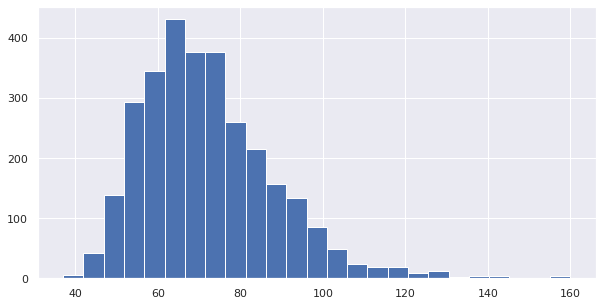

In [27]:
plt.figure(figsize=(10, 5))
plt.hist(samples_w, bins=25)
#plt.show()

In [132]:
samples_w.mode()[0], samples_w.mean(), samples_w.median()

(70.0, 72.12266666666666, 70.0)

__Resposta__:
* A forma do gráfico segue uma forma assimétrica, com uma leve assimetria positiva. Observando os valores da moda, média e mediana, os mesmos seguem valores bem próximos, características de uma distribuição normal. Todavia, não necessariamente. E o p-valor pode confirmar que não podemos inferir que as alturas são normalmente distribúidas.

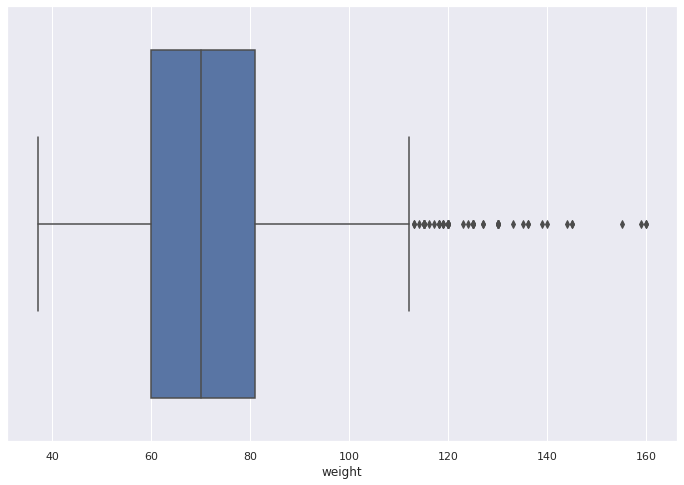

In [31]:
sns.boxplot(samples_w)
#plt.show()

__Resposta__:
* No boxplot podemos ver claramente uma maior inclinação positiva.

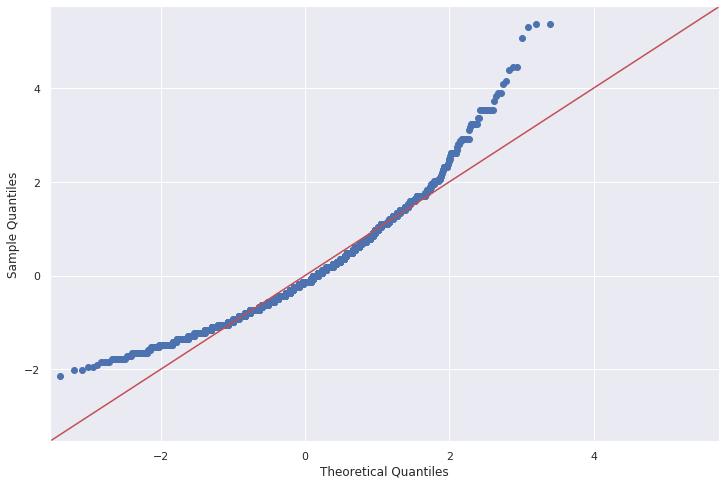

In [151]:
import statsmodels.api as sm
sm.qqplot(samples_w, fit=True, line="45");

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [46]:
def q4():
    transform = np.log(get_sample(athletes, 'weight', n=3000))
    return bool(sct.normaltest(transform)[1] > .05)
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

In [52]:
log_samples_w = np.log(get_sample(athletes, 'weight', n=3000))

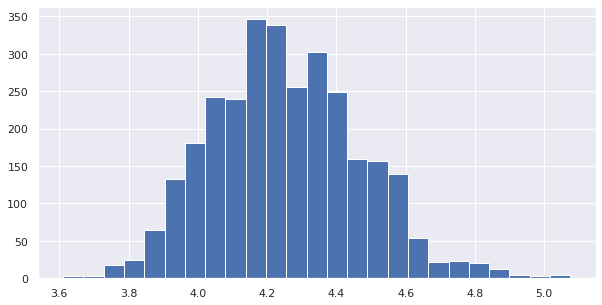

In [53]:
plt.figure(figsize=(10, 5))
plt.hist(log_samples_w, bins=25)
#plt.show()

In [150]:
log_samples_w.mode()[0], log_samples_w.mean(), log_samples_w.median()

(4.248495242049359, 4.254356966378166, 4.248495242049359)

__Resposta__:
* Com a transformação logarítimica o gráfico segue aparência de uma distribuição normal, mas ainda assim o p-valor indica o contrário. Os valores da moda, média e mediana estão ainda mais próximos.
    
* Como os valores sofreram uma transformação, a magnitudade dos dados 
    diferem dos valores anteriores, sem transformação. O resultado do p-valor do teste dos dados com transformação 
    foi maior do que p-valor dos dados sem transformação.

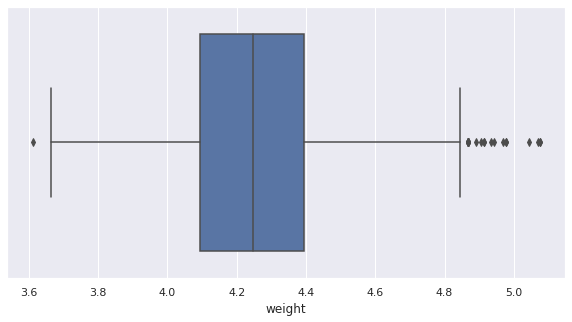

In [54]:
plt.figure(figsize=(10, 5))
sns.boxplot(log_samples_w)
#plt.show()

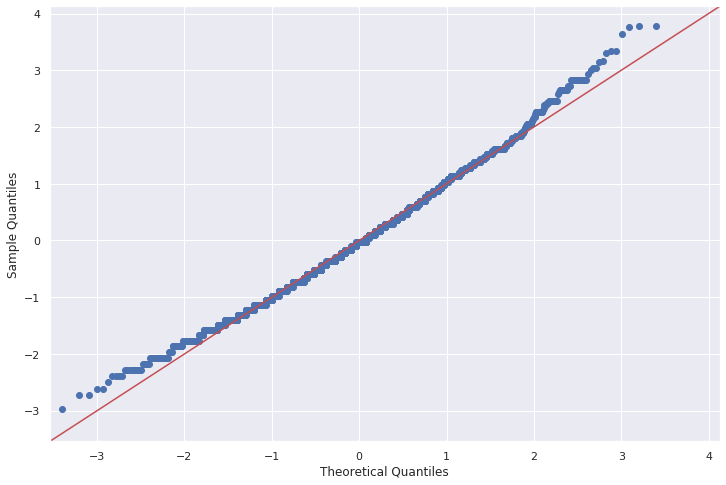

In [153]:
import statsmodels.api as sm
sm.qqplot(log_samples_w, fit=True, line="45");

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [88]:
bra = athletes[athletes['nationality'] == 'BRA']['height']
usa = athletes[athletes['nationality'] == 'USA']['height']
can = athletes[athletes['nationality'] == 'CAN']['height']

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [91]:
def q5():
    test_ind = sct.ttest_ind(bra, usa, nan_policy='omit')
    return bool(test_ind[1] > .05)
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [93]:
def q6():
    test_ind = sct.ttest_ind(bra, can, nan_policy='omit')
    return bool(test_ind[1] > .05)
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [155]:
def q7():
    test_ind = sct.ttest_ind(usa, can, equal_var=False, nan_policy='omit')
    return float(np.round(test_ind[1], 8))
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

__Resposta__:
* Com esse resultado o p-valor é significante com valores 0 com três casas decimais após a virgula para um nível
    de significância de 5%, isso indica que a hipótese nula é rejeitada.
    
* De acordo com os resultados os atletas do Brasil e Canadá tem média estatisticamente iguais, os atletas do Brasil e USA não podemos afirmar que são estatisticamente iguais e o mesmo para USA e Canadá.